# Modified Concrete Strength Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, KFold

In [2]:
data = pd.read_csv("/kaggle/input/modified-concrete-data/data.csv")
data

,Cement_kg_m3,SilicaFume_%_of_cement_kg_m3,Sand_kg_m3,GlassPowder_%_of_sand_kg_m3,Recycled_Aggregate_kg_m3,Water_Binder_ratio,Superplasticizer_%_of_binder_kg_m3,Curing_Age_days,fc_MPa_28d,source_reference
0,459.000,81.000,608.40,67.60,1040.0,0.300000,0.004630,28,79.986111,UCI Concrete Compressive Strength Dataset (Yeh...
1,459.000,81.000,608.40,67.60,1055.0,0.300000,0.004630,28,61.887366,UCI Concrete Compressive Strength Dataset (Yeh...
2,282.625,49.875,534.60,59.40,932.0,0.480000,0.000000,270,40.269535,UCI Concrete Compressive Strength Dataset (Yeh...
3,282.625,49.875,534.60,59.40,932.0,0.480000,0.000000,365,41.052780,UCI Concrete Compressive Strength Dataset (Yeh...
4,168.810,29.790,742.95,82.55,978.4,0.580060,0.000000,360,44.296075,UCI Concrete Compressive Strength Dataset (Yeh...
...,...,...,...,...,...,...,...,...,...,...
995,134.810,23.790,647.73,71.97,953.3,0.413459,0.035419,28,27.681082,UCI Concrete Compressive Strength Dataset (Yeh...
996,129.710,22.890,615.51,68.39,1001.8,0.511117,0.016100,28,26.859917,UCI Concrete Compressive Strength Dataset (Yeh...
997,263.500,46.500,723.60,80.40,914.3,0.370804,0.022085,28,45.304778,UCI Concrete Compressive Strength Dataset (Yeh...
998,259.080,45.720,634.68,70.52,959.4,0.484669,0.024233,28,30.123206,UCI Concrete Compressive Strength Dataset (Yeh...


In [3]:
data = data.drop('source_reference', axis = 1)
data

,Cement_kg_m3,SilicaFume_%_of_cement_kg_m3,Sand_kg_m3,GlassPowder_%_of_sand_kg_m3,Recycled_Aggregate_kg_m3,Water_Binder_ratio,Superplasticizer_%_of_binder_kg_m3,Curing_Age_days,fc_MPa_28d
0,459.000,81.000,608.40,67.60,1040.0,0.300000,0.004630,28,79.986111
1,459.000,81.000,608.40,67.60,1055.0,0.300000,0.004630,28,61.887366
2,282.625,49.875,534.60,59.40,932.0,0.480000,0.000000,270,40.269535
3,282.625,49.875,534.60,59.40,932.0,0.480000,0.000000,365,41.052780
4,168.810,29.790,742.95,82.55,978.4,0.580060,0.000000,360,44.296075
...,...,...,...,...,...,...,...,...,...
995,134.810,23.790,647.73,71.97,953.3,0.413459,0.035419,28,27.681082
996,129.710,22.890,615.51,68.39,1001.8,0.511117,0.016100,28,26.859917
997,263.500,46.500,723.60,80.40,914.3,0.370804,0.022085,28,45.304778
998,259.080,45.720,634.68,70.52,959.4,0.484669,0.024233,28,30.123206


In [4]:
data.isnull().sum()

Cement_kg_m3                          0
SilicaFume_%_of_cement_kg_m3          0
Sand_kg_m3                            0
GlassPowder_%_of_sand_kg_m3           0
Recycled_Aggregate_kg_m3              0
Water_Binder_ratio                    0
Superplasticizer_%_of_binder_kg_m3    0
Curing_Age_days                       0
fc_MPa_28d                            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement_kg_m3                        1000 non-null   float64
 1   SilicaFume_%_of_cement_kg_m3        1000 non-null   float64
 2   Sand_kg_m3                          1000 non-null   float64
 3   GlassPowder_%_of_sand_kg_m3         1000 non-null   float64
 4   Recycled_Aggregate_kg_m3            1000 non-null   float64
 5   Water_Binder_ratio                  1000 non-null   float64
 6   Superplasticizer_%_of_binder_kg_m3  1000 non-null   float64
 7   Curing_Age_days                     1000 non-null   int64  
 8   fc_MPa_28d                          1000 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 70.4 KB


* Heatmap showing correlations

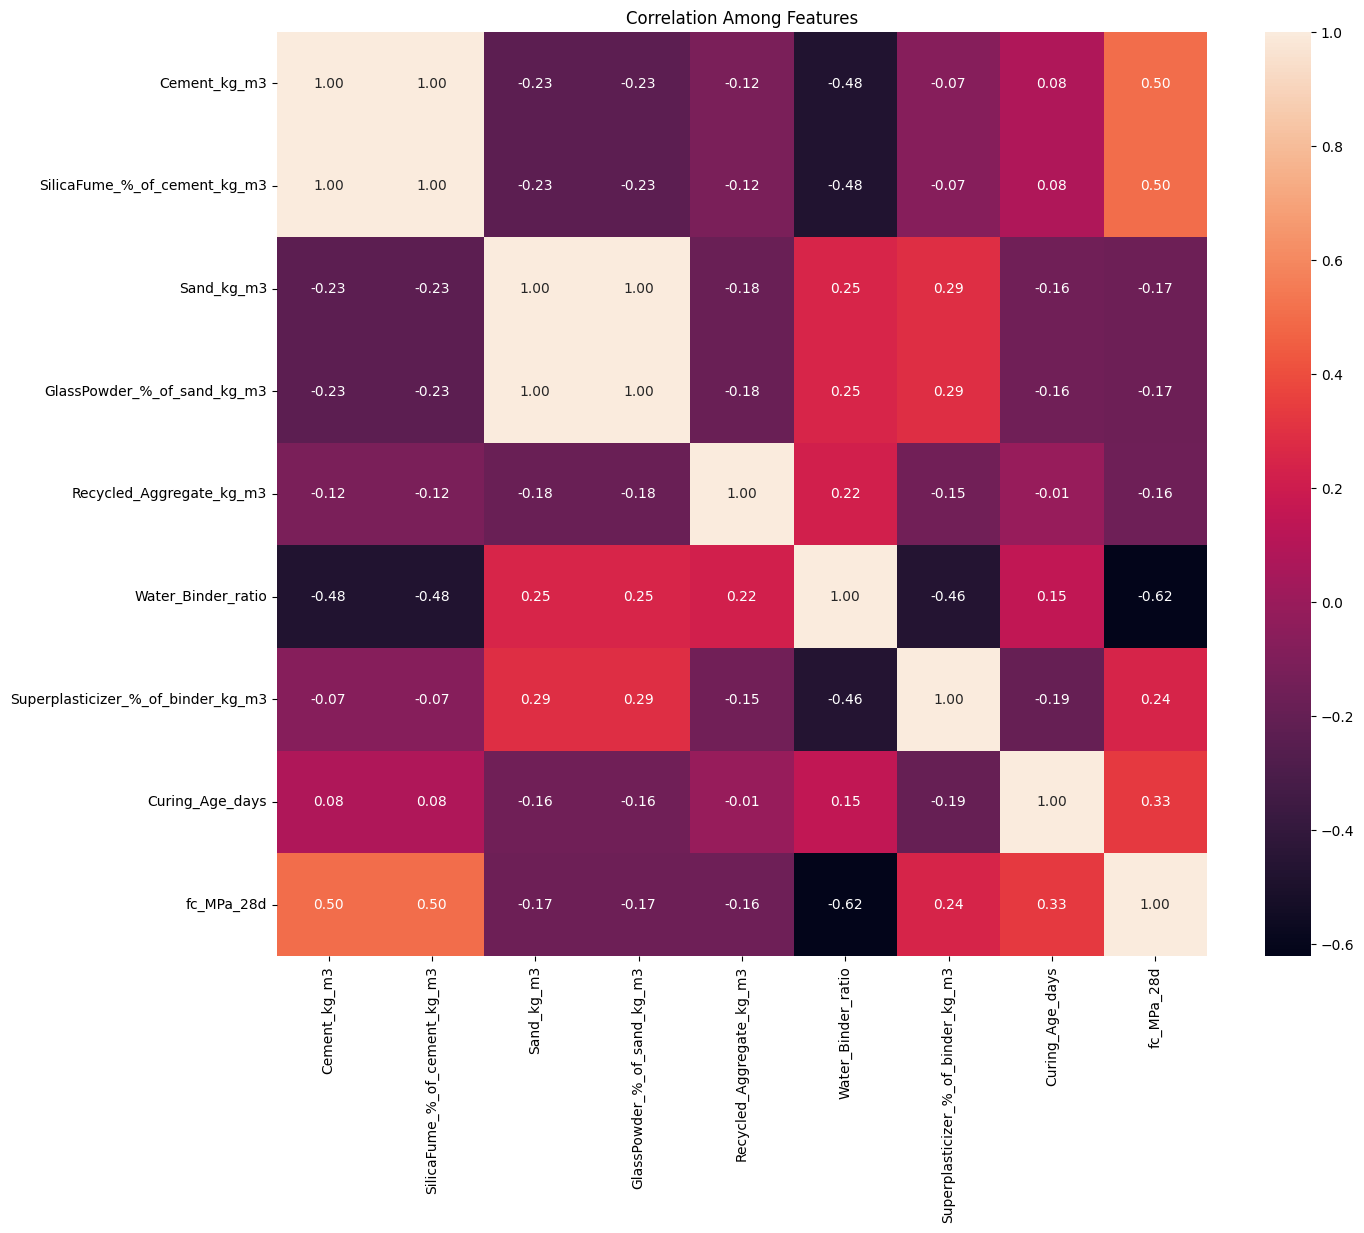

In [6]:
plt.figure(figsize = (15,12))
sns.heatmap(data.corr(), annot = True, fmt = '.2f')
plt.title("Correlation Among Features")
plt.show()

# Data Preprocessing

In [11]:
def preprocess_inputs(df):
    df = df.copy()

    y = df['fc_MPa_28d'].copy()
    X = df.drop('fc_MPa_28d', axis = 1).copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
    X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [12]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [13]:
X_train

,Cement_kg_m3,SilicaFume_%_of_cement_kg_m3,Sand_kg_m3,GlassPowder_%_of_sand_kg_m3,Recycled_Aggregate_kg_m3,Water_Binder_ratio,Superplasticizer_%_of_binder_kg_m3,Curing_Age_days
0,0.450876,0.450876,0.903756,0.903756,-0.589104,0.816216,-1.050844,-0.692263
1,-0.886662,-0.886662,0.352174,0.352174,1.336034,0.445763,1.266436,-0.296684
2,1.510331,1.510331,-0.744680,-0.744680,-0.122799,-1.332671,0.518178,0.146364
3,-1.102210,-1.102210,-0.307958,-0.307958,0.389095,-0.440109,0.302814,-0.518208
4,0.094599,0.094599,-0.025225,-0.025225,1.205781,1.202047,-1.050844,-0.628970
...,...,...,...,...,...,...,...,...
695,0.728397,0.728397,-0.191835,-0.191835,-0.413263,-1.303154,0.505416,-0.628970
696,-0.498414,-0.498414,0.094053,0.094053,1.041663,0.172774,0.356460,-0.518208
697,0.272738,0.272738,0.151483,0.151483,-0.669861,-0.546045,0.682244,-0.296684
698,-1.102210,-1.102210,-0.307958,-0.307958,0.389095,-0.440109,0.302814,-0.296684


In [14]:
X_train.mean()

Cement_kg_m3                          5.176811e-16
SilicaFume_%_of_cement_kg_m3          7.105427e-17
Sand_kg_m3                            2.017434e-16
GlassPowder_%_of_sand_kg_m3          -3.045183e-17
Recycled_Aggregate_kg_m3              1.997133e-15
Water_Binder_ratio                    5.722407e-16
Superplasticizer_%_of_binder_kg_m3   -2.537653e-17
Curing_Age_days                       7.612958e-18
dtype: float64

In [15]:
X_train.var()

Cement_kg_m3                          1.001431
SilicaFume_%_of_cement_kg_m3          1.001431
Sand_kg_m3                            1.001431
GlassPowder_%_of_sand_kg_m3           1.001431
Recycled_Aggregate_kg_m3              1.001431
Water_Binder_ratio                    1.001431
Superplasticizer_%_of_binder_kg_m3    1.001431
Curing_Age_days                       1.001431
dtype: float64

In [16]:
y_train

541    15.615942
440    24.848715
482    56.144031
422    31.812423
778    14.796155
         ...    
106    55.895819
270    26.772353
860    38.458971
435    41.203086
102    46.898158
Name: fc_MPa_28d, Length: 700, dtype: float64

# Model Selection

In [17]:
Models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "Support Vector Machine (RBF Kernel)": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Neural Network": MLPRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Ada Boost": AdaBoostRegressor()
}

for name, model in Models.items():
    model.fit(X_train, y_train)
    print(name + " is trained.")

Linear Regression is trained.
Ridge Regression is trained.
Support Vector Machine (Linear Kernel) is trained.
Support Vector Machine (RBF Kernel) is trained.
Decision Tree is trained.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network is trained.
Random Forest is trained.
Gradient Boosting is trained.
Ada Boost is trained.


* Scoring of models

In [18]:
for name, model in Models.items():
    print("The score of {} model is: {:.3f}".format(name, model.score(X_test, y_test)))

The score of Linear Regression model is: 0.602
The score of Ridge Regression model is: 0.600
The score of Support Vector Machine (Linear Kernel) model is: 0.592
The score of Support Vector Machine (RBF Kernel) model is: 0.639
The score of Decision Tree model is: 0.726
The score of Neural Network model is: 0.441
The score of Random Forest model is: 0.826
The score of Gradient Boosting model is: 0.801
The score of Ada Boost model is: 0.799


In [20]:
# The best model is Random Forest Model.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


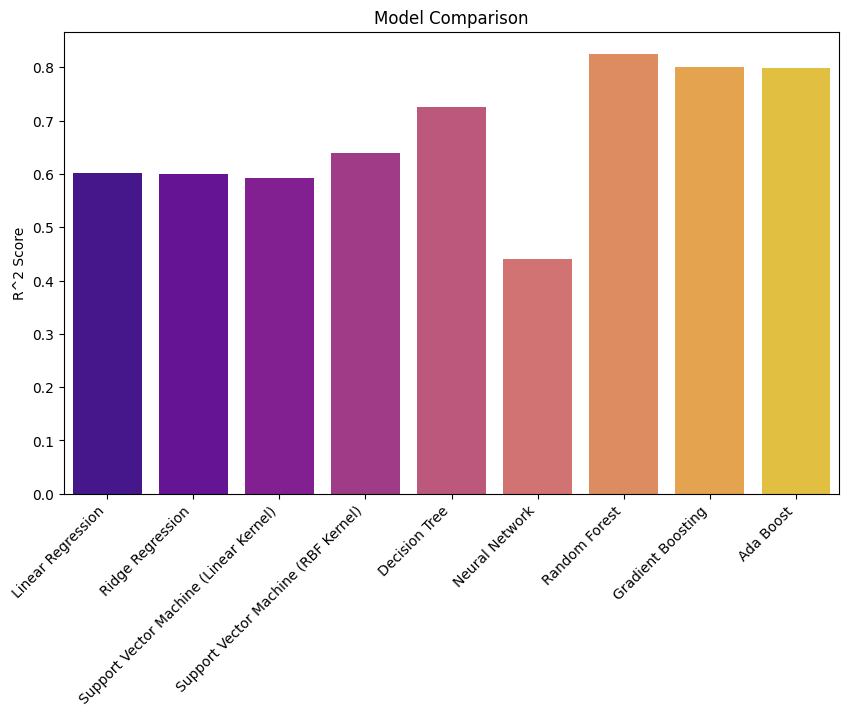

In [21]:
# Calculation of R^2 scores for each model
scores = {name: model.score(X_test, y_test) for name, model in Models.items()}

# Model comparison bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette = 'plasma')
# There are more palette options in seaborn like 'coolwarm', 'plasma', 'inferno', 'magma', 'cividis', etc.
plt.xticks(rotation=45, ha="right")
plt.ylabel("R^2 Score")
plt.title("Model Comparison")
plt.show()

# Model Optimization

* Optimizing the best model with hyperparameters using GridSearchCV

In [22]:
best_model = RandomForestRegressor()

best_model.fit(X_train, y_train)

print("Random Forest R^2 score before optimization: {:.3f}".format(best_model.score(X_test, y_test)))

Random Forest R^2 score before optimization: 0.820


In [24]:
params = {
    'n_estimators': [100, 200, 300],        # number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # number of features considered for splitting
    'bootstrap': [True, False]              # whether bootstrap samples are used
}

clf = GridSearchCV(best_model, params)
clf.fit(X_train, y_train)
print("Best parameters found: ", clf.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best parameters found:  {'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [26]:
print("Random Forest Regressor R^2 score after optimization: {:.3f}".format(clf.score(X_test, y_test)))

Random Forest Regressor R^2 score after optimization: 0.838


In [27]:
# Predictions on test data
y_pred = clf.predict(X_test)

# Compare actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

        Actual  Predicted
521  24.131660  25.835645
737  17.540269  18.698557
740  30.957472  18.461952
660  31.023662  27.836203
411  23.076762  18.235418


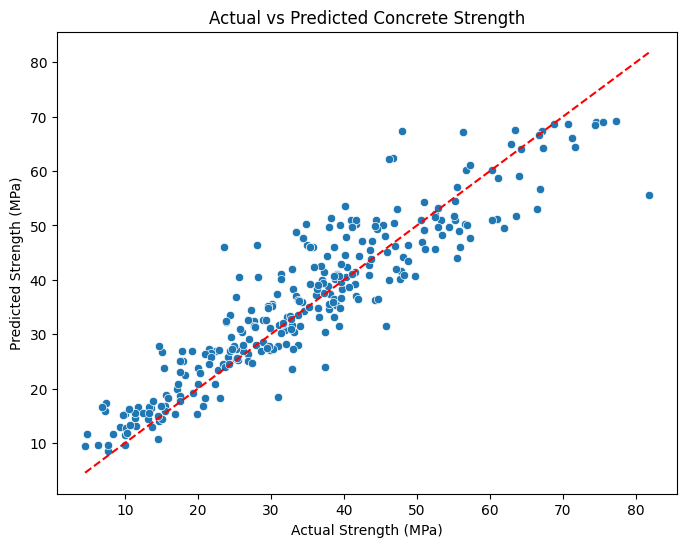

In [28]:
# Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Actual vs Predicted Concrete Strength")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.show()

In [29]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2:", r2_score(y_test, y_pred))

MAE: 4.771745225626827
MSE: 40.78275165826607
RMSE: 6.386137460019638
R^2: 0.8380981704638046


In [30]:
data.head(1)

,Cement_kg_m3,SilicaFume_%_of_cement_kg_m3,Sand_kg_m3,GlassPowder_%_of_sand_kg_m3,Recycled_Aggregate_kg_m3,Water_Binder_ratio,Superplasticizer_%_of_binder_kg_m3,Curing_Age_days,fc_MPa_28d
0,459.0,81.0,608.4,67.6,1040.0,0.3,0.00463,28,79.986111


In [31]:
# dataset features are in this order:
# ['Cement_kg_m3', 'SilicaFume_%_of_cement_kg_m3', 'Sand_kg_m3', 'GlassPowder_%_of_sand_kg_m3', 'Recycled_Aggregate_kg_m3', 'Water_Binder_ratio', 'Superplasticizer_%_of_binder_kg_m3', 'Curing_Age_days', 'fc_MPa_28d']

In [32]:
# Example new input (values must match the dataset order & scale)
new_mix = np.array([[350, 52.5, 600, 60, 1200, 0.4, 3.4, 28]])

# Fit scaler on training data if not available
scaler = StandardScaler()
scaler.fit(X_train)

# Scale input using the fitted scaler
new_mix_scaled = scaler.transform(new_mix)

# Predict compressive strength
predicted_strength = clf.predict(new_mix_scaled)
print("Predicted Concrete Strength (MPa):", predicted_strength[0])

Predicted Concrete Strength (MPa): 46.343241954599996


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
